In [95]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# loading the IMDB movie review dataset
df = pd.read_csv('IMDB Dataset.csv')

In [ ]:
df.shape

(50000, 2)

In [ ]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Text preprocessing function
def preprocess_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers using regular expressions
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Perform stemming
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(text)])
    return text

In [ ]:
# Apply text preprocessing to the 'review' column
df['review'] = df['review'].apply(preprocess_text)

<ipython-input-9-6fd26bd25862>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
df.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,a wonder littl product the film techniqu is ve...,positive
2,i thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive


In [ ]:
# Encode the labels (positive and negative) to numerical values
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [ ]:
# Preprocess the data
X_text = df['review'].values
y = df['sentiment'].values

In [ ]:
# Split the dataset into training and testing sets
X_text_train, X_text_test, y_train, y_test = train_test_split(
    X_text, y, test_size=0.2, random_state=42
)

In [ ]:
# Vectorize the text using TF-IDF
max_words = 10000
tfidf_vectorizer = TfidfVectorizer(max_features=max_words, stop_words='english')
X_text_train_tfidf = tfidf_vectorizer.fit_transform(X_text_train)
X_text_test_tfidf = tfidf_vectorizer.transform(X_text_test)

In [ ]:
# Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_text_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_text_test_tfidf)
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [96]:
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

In [ ]:
print("Multinomial Naive Bayes Accuracy:", nb_accuracy)
print(classification_report(y_test, nb_predictions))

Multinomial Naive Bayes Accuracy: 0.8527
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# Support Vector Machines
svm_model = SVC()
svm_model.fit(X_text_train_tfidf, y_train)
svm_predictions = svm_model.predict(X_text_test_tfidf)
svm_accuracy = accuracy_score(y_test, svm_predictions)

In [97]:
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

In [ ]:
print("Support Vector Machines Accuracy:", svm_accuracy)
print(classification_report(y_test, svm_predictions))

Support Vector Machines Accuracy: 0.8916
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
#Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_text_train_tfidf, y_train)
rf_predictions = rf_model.predict(X_text_test_tfidf)
rf_accuracy = accuracy_score(y_test, rf_predictions)

In [98]:
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

In [ ]:
print("Random Forest Accuracy:", rf_accuracy)
print(classification_report(y_test, rf_predictions))

Random Forest Accuracy: 0.848
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [ ]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_text_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_text_test_tfidf)
lr_accuracy = accuracy_score(y_test, lr_predictions)

In [99]:
lr_precision = precision_score(y_test, lr_predictions)
lr_recall = recall_score(y_test, lr_predictions)
lr_f1 = f1_score(y_test, lr_predictions)

In [ ]:
print("Logistic Regression Accuracy:", lr_accuracy)
print(classification_report(y_test, lr_predictions))

Logistic Regression Accuracy: 0.8894
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [ ]:
#testing on the custom review not present in the dataset
my_custom_review = "Movie was awful. I did not like it at all/"
preprocessed_review = preprocess_text(my_custom_review)

<ipython-input-9-6fd26bd25862>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [ ]:
custom_review_tfidf = tfidf_vectorizer.transform([preprocessed_review])

In [ ]:
nb_prediction = nb_model.predict(custom_review_tfidf)
svm_prediction = svm_model.predict(custom_review_tfidf)
rf_prediction = rf_model.predict(custom_review_tfidf)
lr_prediction = lr_model.predict(custom_review_tfidf)

In [ ]:
sentiment_mapping = {0:'Negative', 1: 'Positive'}

In [ ]:
nb_sentiment_label = sentiment_mapping.get(nb_prediction[0])
svm_sentiment_label = sentiment_mapping.get(svm_prediction[0])
rf_sentiment_label = sentiment_mapping.get(rf_prediction[0])
lr_sentiment_label = sentiment_mapping.get(lr_prediction[0])

In [ ]:
print("Naive Bayes Prediction:", nb_sentiment_label)
print("SVM Prediction:", svm_sentiment_label)
print("Random Forest Prediction:", rf_sentiment_label)
print("Logistic Regression Prediction:", lr_sentiment_label)

Naive Bayes Prediction: Negative
SVM Prediction: Negative
Random Forest Prediction: Negative
Logistic Regression Prediction: Negative


In [ ]:
# Create confusion matrices
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
lr_conf_matrix = confusion_matrix(y_test, lr_predictions)
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

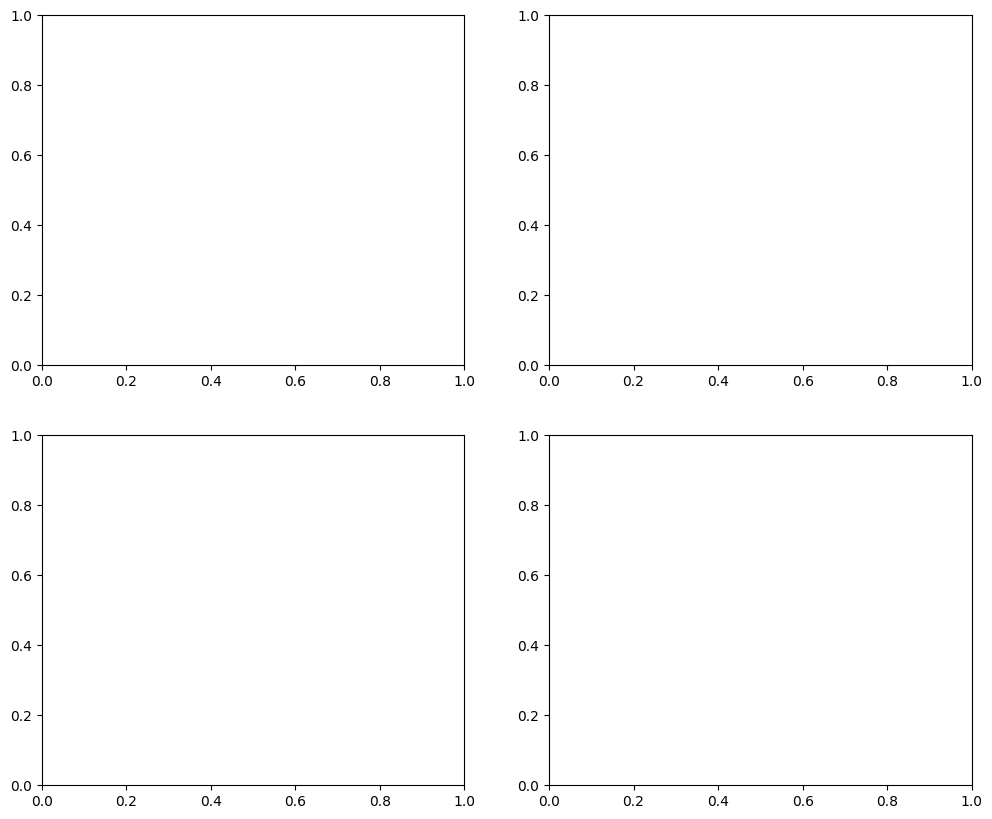

In [ ]:
# Plot confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

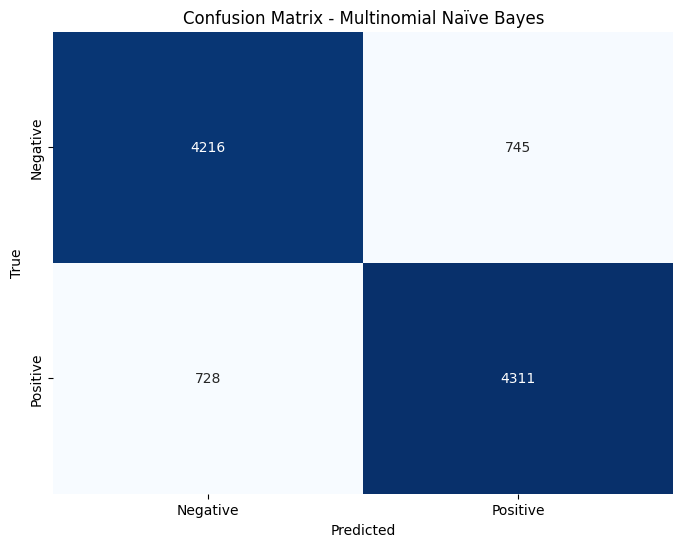

In [ ]:
# Display the Multinomial Naïve Bayes - confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Multinomial Naïve Bayes')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


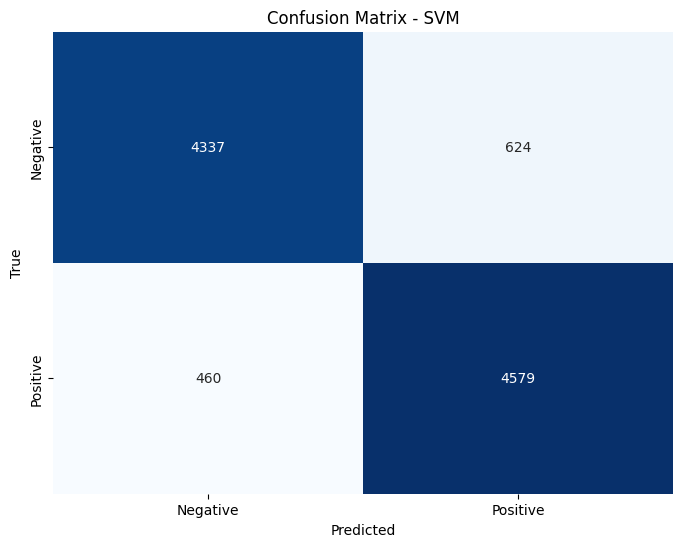

In [ ]:
# Display the SVM - confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

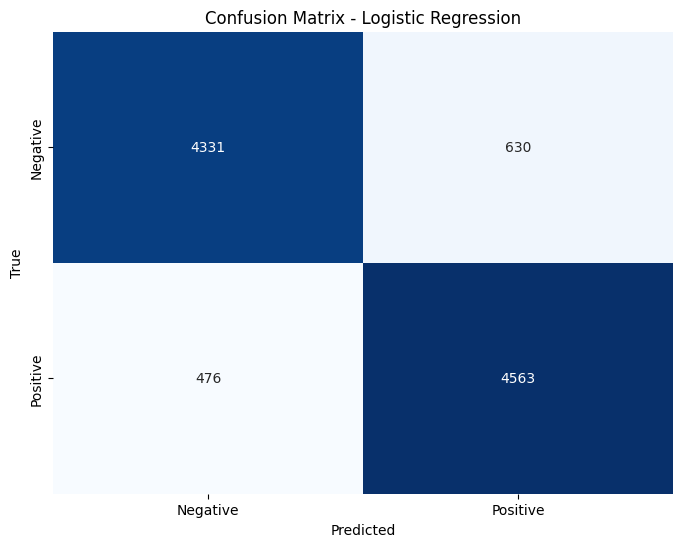

In [ ]:
# Display the Logistic Regression - confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

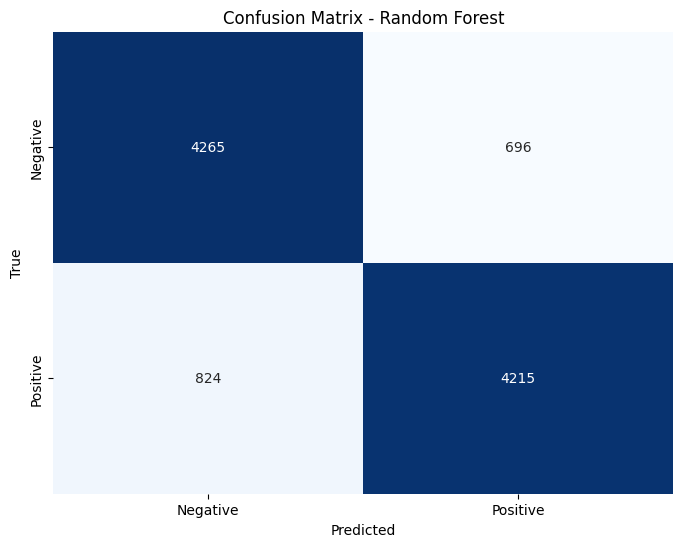

In [ ]:
# Display the Random Forest - confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [100]:
# Model Comparison Plot
models = ['Multinomial Naïve Bayes', 'Support Vector Machines', 'Logistic Regression', 'Random Forest']
accuracy_scores = [nb_accuracy,svm_accuracy, lr_accuracy, rf_accuracy]
precision_scores = [nb_precision, svm_precision, lr_precision, rf_precision]
recall_scores = [nb_recall, svm_recall, lr_recall, rf_recall]
f1_scores = [nb_f1, svm_f1, lr_f1, rf_f1]

In [101]:
# Create a DataFrame for easy plotting
df_metrics = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
})

In [102]:
# Melt the DataFrame to transform it for easier plotting
df_metrics_melted = pd.melt(df_metrics, id_vars=['Model'], var_name='Metric', value_name='Score')

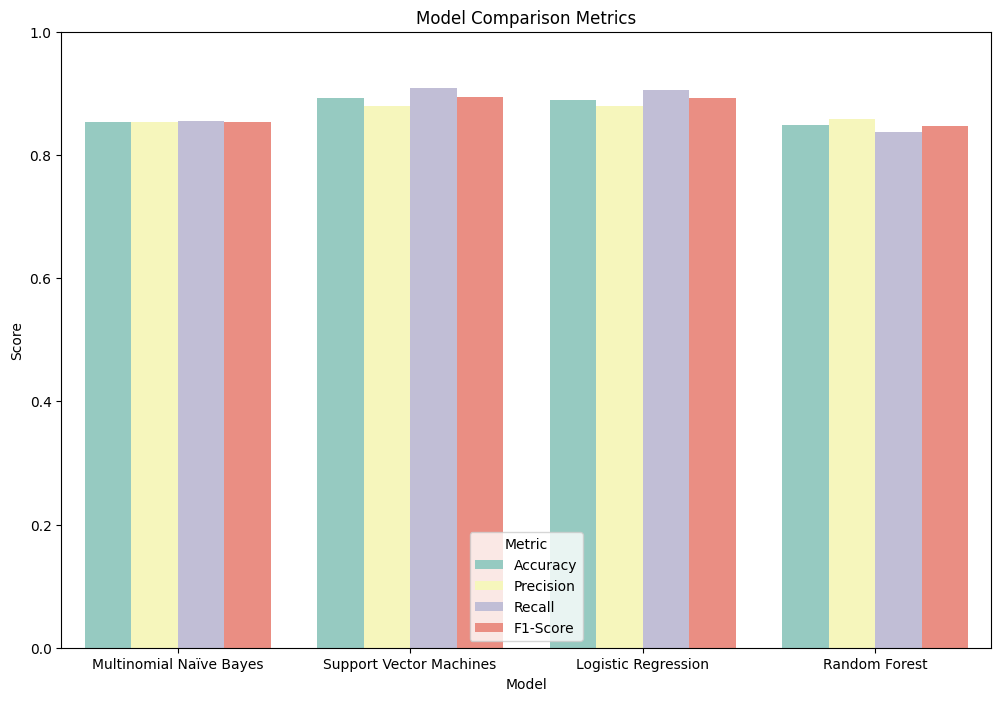

In [103]:
# Plot the comparison using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Score', hue='Metric', data=df_metrics_melted, palette='Set3')
plt.title('Model Comparison Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # Set the y-axis range (0 to 1 for metrics like accuracy, precision, recall, and F1-score)
plt.show()